<a href="https://colab.research.google.com/github/ashrafalaghbari/GA-TCN-LSTM/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 60

Autosaving every 60 seconds


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [2]:
df = pd.read_excel("/content/raw_data.xlsx",
                         sheet_name='Daily Production Data', parse_dates=["DATEPRD"], index_col="DATEPRD")
df = df.sort_values(by="DATEPRD")

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15634 entries, 2007-09-01 to 2016-12-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   NPD_FIELD_CODE            15634 non-null  int64  
 4   NPD_FIELD_NAME            15634 non-null  object 
 5   NPD_FACILITY_CODE         15634 non-null  int64  
 6   NPD_FACILITY_NAME         15634 non-null  object 
 7   ON_STREAM_HRS             15349 non-null  float64
 8   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 9   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 10  AVG_DP_TUBING             8980 non-null   float64
 11  AVG_ANNULUS_PRESS         7890 non-null   float64
 12  AVG_CHOKE_SIZE_P          8919 non-null   float64
 13  AVG_CHOKE_UOM             9161 non-null   ob

# Data Description
<div style="height190px">

| Abbreviation              | Description                                           |Units                  | Units (After Conversion)
|---------------------------|:-----------------------------------------------------:|:---------------------:|:-----------------------------:|
| DATEPRD                   | Date of Record                                       |  days                  | days                          |                           
| WELL_BORE_CODE           | Well Bore Code                                        | N/A                   | N/A                           |     
| NPD_WELL_BORE_CODE       | Norwegian Petroleum Directorate Well Bore Code        | N/A                   | N/A                           |
| NPD_WELL_BORE_NAME       | Norwegian Petroleum Directorate Well Bore Nmae        | N/A                   | N/A                           | 
| NPD_FIELD_CODE           | Norwegian Petroleum Directorate Field Code            | N/A                   | N/A                           |
| NPD_FIELD_NAME           | Norwegian Petroleum Directorate Field Name            | N/A                   | N/A                           |    
| NPD_FACILITY_CODE        | Norwegian Petroleum Directorate Facility Code         | N/A                   | N/A                           |
| NPD_FACILITY_NAME        | Norwegian Petroleum Directorate Facility Name         | N/A                   | N/A                           |
| ON_STREAM_HRS             | On stream hours                                       | hours                 | hours                         |
| AVG_DOWNHOLE_PRESSURE     | Average Downhole Pressure                             | bar                   | psig                          |
| AVG_DOWNHOLE_TEMPERATURE  | Average Downhole Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| AVG_DP_TUBING Average     | Differential Pressure of Tubing                       | bar                   | psig                          |
| AVG_ANNULUS_PRESS         | Average Annular Pressure                              | bar                   | psig                          |
| AVG_CHOKE_SIZE_P          | Average Choke Size Percentage                         | %                     | %                             |
| AVG_CHOKE_UOM             | Average Choke (Unit of Measure)                       | N/A                   | N/A                           |
| AVG_WHP_P                 | Average Wellhead Pressure                             | bar                   | psig                          |
| AVG_WHT_P                 | Average Wellhead Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| DP_CHOKE_SIZE             | Differential Pressure at the Choke                    | bar                   | psig                          |
| BORE_OIL_VOL              | Oil Volume from Well                                  | m<sup>3</sup>         | bbl                     |
| BORE_WAT_VOL              | Water Volume from Well                                | m<sup>3</sup>         | bbl                      |
| BORE_GAS_VOL              | Gas Volume from Well                                  | m<sup>3</sup>         | bbl                      |
| BORE_WI_VOL               | Water Volume Injected                                 | m<sup>3</sup>         | bbl                      |
| FLOW_KIND                 | Type of Flow (production or injection)                | N/A                   | N/A                           |
| WELL_TYPE                 | Type of Well (oil production or water injection)      | N/A                   | N/A                           |</div>
 

       
 
 
 
 
 
 
 
 
 

 

In [5]:
df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-5 AH', 'NO 15/9-F-4 AH', 'NO 15/9-F-14 H',
       'NO 15/9-F-12 H', 'NO 15/9-F-11 H', 'NO 15/9-F-15 D',
       'NO 15/9-F-1 C'], dtype=object)

In [6]:
# prodcution well
F_14 = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']

In [7]:
# injection well
F_4 = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-4 AH']
F_4 = F_4[['ON_STREAM_HRS','BORE_WI_VOL']]

In [8]:
# injection well
F_5 = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-5 AH']
F_5 = F_5[['ON_STREAM_HRS','BORE_WI_VOL']]

In [9]:
# change the name of ON_STREAM_HRS so it does not contradict with ON_STREAM_HRS for production
F_4 = F_4.rename(columns={"ON_STREAM_HRS":"F_4_ON_STREAM_HRS", "BORE_WI_VOL":"F_4_BORE_WI_VOL"})
F_5 = F_5.rename(columns={"ON_STREAM_HRS":"F_5_ON_STREAM_HRS", "BORE_WI_VOL":"F_5_BORE_WI_VOL"})

In [10]:
# merging the injectors data with well F_14
df = pd.concat([F_14, F_4, F_5], axis=1)

In [11]:
# removing irrelevent variables
df = df.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME','AVG_CHOKE_UOM','BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'], axis = 1)

In [12]:
# Units conversion
df["AVG_DOWNHOLE_PRESSURE"] = df["AVG_DOWNHOLE_PRESSURE"] * 14.5037738
df["AVG_WHP_P"]  = df["AVG_WHP_P"] * 14.5037738
df['AVG_DP_TUBING'] = df["AVG_DP_TUBING"] * 14.5037738
df["DP_CHOKE_SIZE"] = df["DP_CHOKE_SIZE"] * 14.5037738
df['AVG_ANNULUS_PRESS'] = df['AVG_ANNULUS_PRESS'] * 14.5037738
df["AVG_DOWNHOLE_TEMPERATURE"] = (df["AVG_DOWNHOLE_TEMPERATURE"] * (9/5)) + 32
df["AVG_WHT_P"] = (df["AVG_WHT_P"] * (9/5)) + 32
df["BORE_OIL_VOL"]  = df["BORE_OIL_VOL"] * 6.2898106
df["BORE_WAT_VOL"] = df["BORE_WAT_VOL"]  * 6.2898106
df["BORE_GAS_VOL"]  = df["BORE_GAS_VOL"] * 35.31466672148859
df["F_4_BORE_WI_VOL"] = df["F_4_BORE_WI_VOL"] * 6.2898106
df["F_5_BORE_WI_VOL"] =  df["F_5_BORE_WI_VOL"] * 6.2898106

* References for units conversion: [Rigzone](https://www.rigzone.com/calculator/default.asp#calc)/ [DrillingFormulas](https://www.drillingformulas.com/temperature-conversion-formulas/)/ [PETROLEUM OFFICE](https://petroleumoffice.com/unitconverter/volume-flow-rate/)

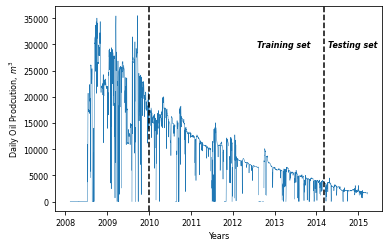

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(140/25.4,90/25.4))
plt.plot(df['BORE_OIL_VOL'][:'2015-03-23'], linewidth =0.5)

# create the horizontal dashed line
plt.axvline(x=pd.to_datetime('2010-01-01'), color='black', linestyle='--')
plt.axvline(x=pd.to_datetime('2014-03-07'), color='black', linestyle='--')
#add text labels
plt.text(pd.to_datetime('2012-08-01'), 30000, 'Training set',
         fontsize=8, rotation=0, verticalalignment='center', style='italic', fontweight='bold')
plt.text(pd.to_datetime('2014-04-15'), 30000, 'Testing set',
         fontsize=8, rotation=0, verticalalignment='center', style='italic', fontweight='bold')
#  # add axis labels
plt.ylabel(r'Daily Oil Prodcution, $m^3$', fontsize=8,labelpad=1.5)
plt.xlabel('Years', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.savefig("Oil production profile for well NO159–F–14H .jpeg",
                dpi=1000, bbox_inches='tight')
plt.show()

In [110]:
# Period of interest -> 2010/1/1 - 2015/3/23
df = df['2010-01-01':'2015-03-23'] 
df.shape

(1908, 16)

In [103]:
# calculate te number of days that we are suppose to have
from datetime import date
f_date = date(2010, 1, 1)
l_date = date(2015, 3, 23)
delta = l_date - f_date
print(delta.days + 1) # no missing days

1908


In [179]:
df

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-01-01,24.0,3378.643673,223.079164,2629.075052,NaN,50.150825,749.568621,190.264943,271.390953,18593.749401,1.462166e+07,15304.241356,24.0,44109.287732,24.0,49054.221066
2010-01-02,24.0,3377.769461,223.095696,2633.104681,NaN,50.694654,744.664780,190.708397,266.368677,18701.242265,1.469266e+07,16519.118273,24.0,41936.969541,24.0,51515.296516
2010-01-03,24.0,3408.561097,223.074953,2633.733679,NaN,47.665676,774.827418,192.268341,299.398157,17799.912406,1.400904e+07,14796.150455,24.0,41114.572918,24.0,51717.286427
2010-01-04,24.0,3439.266918,223.022721,2633.106376,NaN,44.706230,806.160543,191.994925,333.246980,17002.616014,1.341015e+07,13428.619835,24.0,40267.292699,24.0,51948.640243
2010-01-05,24.0,3429.064568,223.035833,2636.328873,NaN,45.743761,792.735696,191.503603,318.470614,17270.939334,1.361768e+07,9839.905499,24.0,40524.238503,24.0,52129.744099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,24.0,3847.013385,211.367931,3400.136556,202.278634,100.000000,446.876829,190.761010,32.394472,1662.711432,1.366424e+06,21779.601368,24.0,27765.068530,24.0,26704.126695
2015-03-20,24.0,3846.666639,211.352287,3400.424063,201.317602,100.000000,446.242576,190.577844,31.563179,1707.494884,1.397308e+06,23586.538158,24.0,26112.632371,24.0,27951.162219
2015-03-21,24.0,3846.286199,211.349048,3400.238070,200.785289,100.000000,446.048129,191.111429,31.526865,1725.420844,1.408435e+06,22172.777429,24.0,26281.191015,24.0,27980.731217


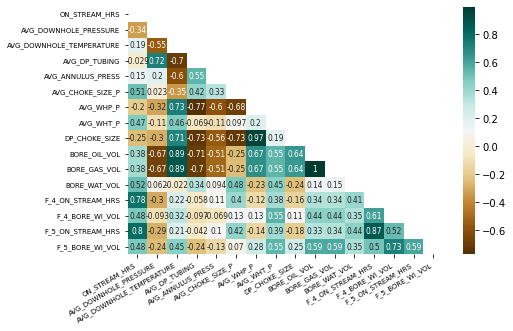

In [178]:
mask = np.triu(np.ones_like(df.corr(method='spearman')))
plt.figure(figsize=(190/25.5,120/25.5 ))
correlation_mat = df.corr("spearman")
ax = sns.heatmap(correlation_mat, annot = True, cmap='BrBG', mask=mask,annot_kws={"fontsize": 7.5})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);


plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01)

plt.savefig("Spearman correlation coefficients of the raw production and injection data .jpeg",
                dpi=1000, bbox_inches='tight')
plt.show()

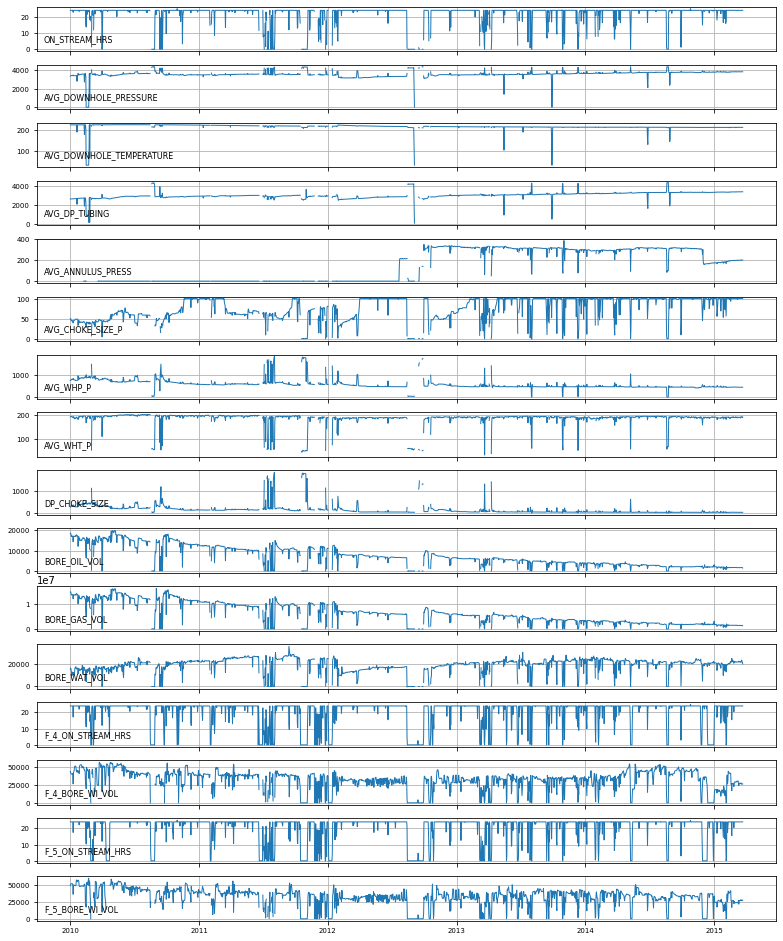

In [115]:

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(280/25.5, 280*1.2/25.5), sharex=True)

axs = axs.ravel()

for id, column in enumerate(df.columns):

    axs[id].plot(df[column], linewidth =1)
    axs[id].grid(True)


    axs[id].legend([column], loc='lower left', fontsize=8, handlelength=0, handletextpad=0, frameon=False)

for ax in axs:
    ax.tick_params(labelsize=7)
    ax.xaxis.label.set_size(7)
    ax.yaxis.label.set_size(7)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plt.savefig("Raw production and injection data for 16 variables from the Volve oil field, spanning the period from 2010 to 2015.jpeg",
                dpi=1000, bbox_inches='tight')

plt.show()


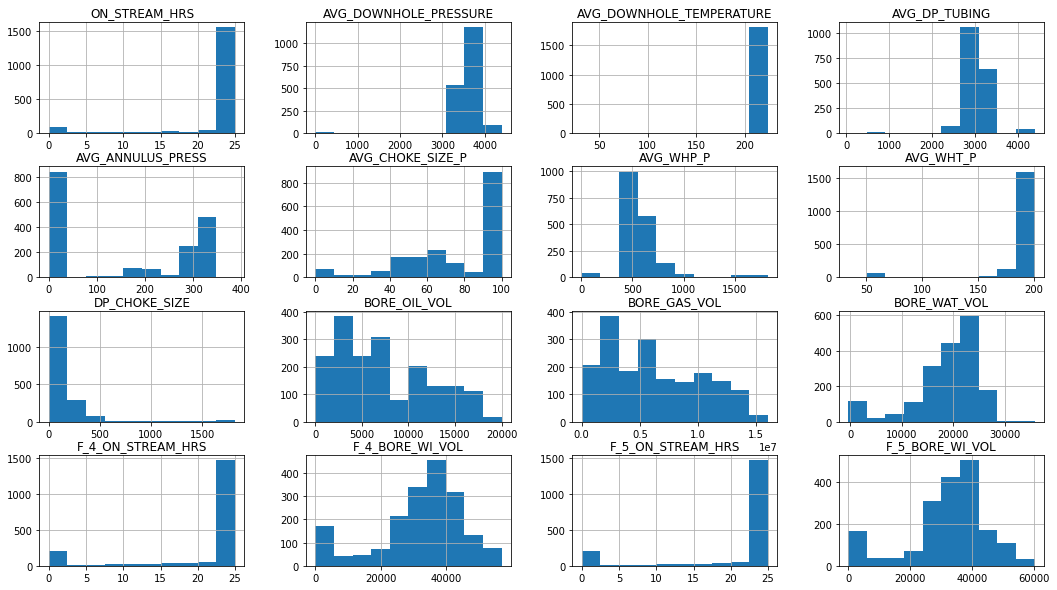

In [112]:
# plotting the distribution of all variables
df.hist(figsize=(18,10))
plt.show()

In [113]:
# check data range constrain
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1828.000000,1828.000000,1828.000000,1828.000000,1764.000000,1802.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1908.000000,1862.000000,1908.000000,1855.000000
mean,21.841193,3583.535031,214.625146,3019.578691,150.044131,75.926647,572.536377,183.015493,152.270115,7261.418839,6.145965e+06,18826.746730,20.318801,31966.662247,20.354637,32030.073489
std,6.049317,373.637560,16.012126,354.479368,149.043042,27.848957,219.312316,29.148980,239.001866,5028.465623,4.125306e+06,6465.248079,7.832144,13563.536469,7.831526,13098.199268
min,0.000000,0.000000,32.000000,39.914966,0.000000,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,-372.293889,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.717504,212.045240,2869.027307,0.000000,58.209641,466.837358,186.971179,42.193006,2982.109277,2.482519e+06,16688.534322,23.660412,27193.841709,23.976393,27747.420619
50%,24.000000,3573.179417,214.761736,2985.324683,166.504338,87.925927,502.575163,189.891963,76.842538,6274.400564,5.642409e+06,20839.337582,24.000000,34665.079944,24.000000,34828.075900
75%,24.000000,3730.074164,219.996743,3208.012793,312.228731,100.000000,608.024884,192.529627,164.022008,11186.679745,9.664422e+06,22753.562815,24.000000,40332.545356,24.000000,39781.794083
max,25.000000,4395.827404,224.190920,4381.731622,386.993210,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [114]:
# check for missing values
df.isnull().sum()

ON_STREAM_HRS                80
AVG_DOWNHOLE_PRESSURE        80
AVG_DOWNHOLE_TEMPERATURE     80
AVG_DP_TUBING                80
AVG_ANNULUS_PRESS           144
AVG_CHOKE_SIZE_P            106
AVG_WHP_P                    80
AVG_WHT_P                    80
DP_CHOKE_SIZE                80
BORE_OIL_VOL                 80
BORE_GAS_VOL                 80
BORE_WAT_VOL                 80
F_4_ON_STREAM_HRS             0
F_4_BORE_WI_VOL              46
F_5_ON_STREAM_HRS             0
F_5_BORE_WI_VOL              53
dtype: int64

<AxesSubplot:>

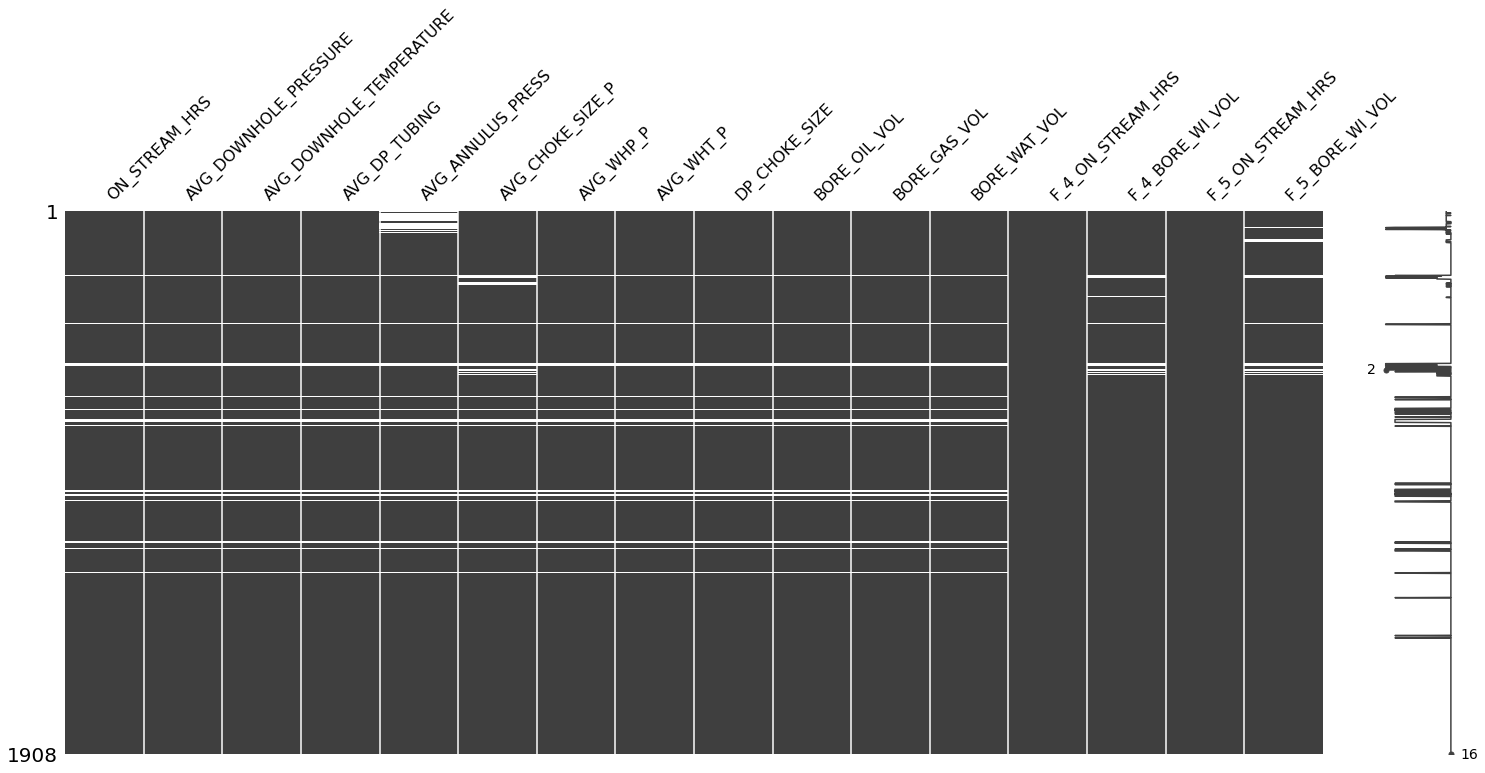

In [180]:
msno.matrix(df)

In [182]:
# duplicated records
df.loc[df.duplicated()]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2011-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2014-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2014-08-22,0.0,4386.87408,210.091874,4381.731622,99.511117,1.28336,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='F_4_BORE_WI_VOL', ylabel='BORE_OIL_VOL'>

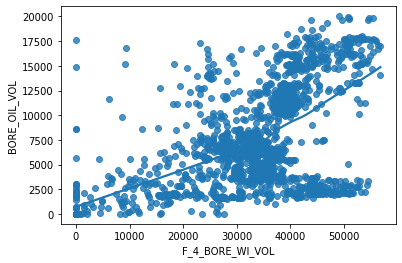

In [184]:
sns.regplot(x = 'F_4_BORE_WI_VOL', y = "BORE_OIL_VOL", data=df, lowess=True)

<AxesSubplot:xlabel='F_5_BORE_WI_VOL', ylabel='BORE_OIL_VOL'>

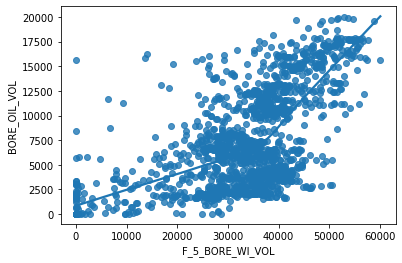

In [185]:
sns.regplot(x = 'F_5_BORE_WI_VOL', y = "BORE_OIL_VOL", data=df, lowess=True)

In [187]:
# create a copy of the df and fill the null values with zero as the cross-correlation function doesn't work with NaN
ccf_df= df.copy()
ccf_df = ccf_df.fillna(0)

In [190]:
#calculate cross correlation
print(sm.tsa.stattools.ccf(ccf_df['F_4_BORE_WI_VOL'], ccf_df['BORE_OIL_VOL'], adjusted=False)[:10])
print(sm.tsa.stattools.ccf(ccf_df['F_5_BORE_WI_VOL'], ccf_df['BORE_OIL_VOL'], adjusted=False)[:10])

[0.56044616 0.48561802 0.4283146  0.40648235 0.39580428 0.38066825
 0.35217222 0.34211243 0.33544509 0.32997548]
[0.61747081 0.54622782 0.49644414 0.47755844 0.45720076 0.42893545
 0.39192351 0.37671625 0.36446362 0.35662165]


In [192]:
df.to_csv("df_raw.csv")